<a href="https://colab.research.google.com/github/Manas24vani/ML_Assignment_project/blob/main/ML_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning Project 3

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
plt.style.use('fivethirtyeight')


In [ ]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [ ]:
df.keys()

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

### Inital EDA

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

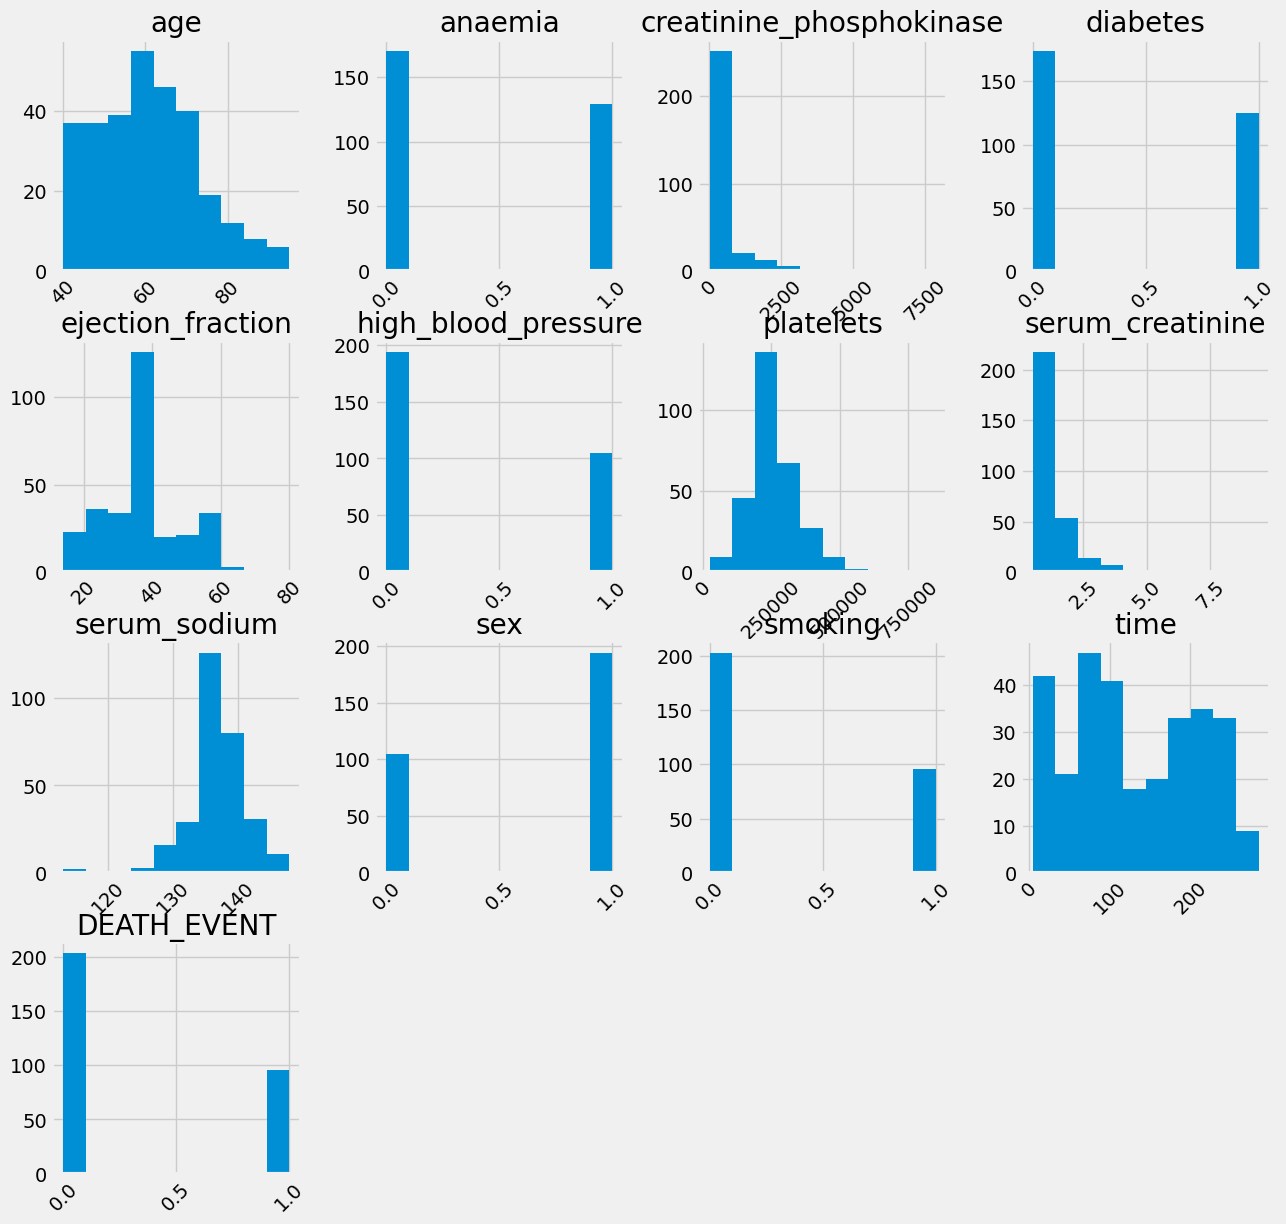

In [ ]:
df.hist(figsize=(14,14), xrot=45)
plt.show()


In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
numerical_cols = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'] 

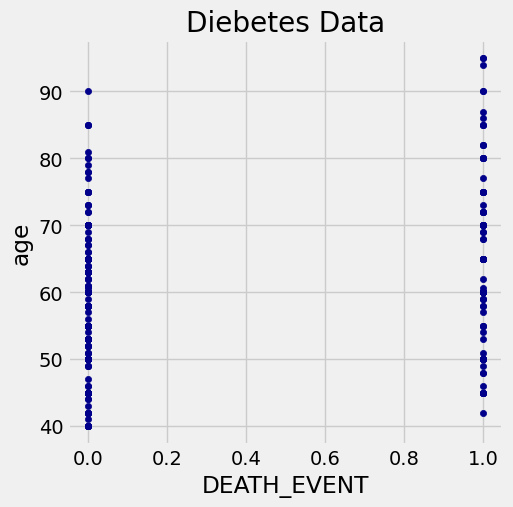

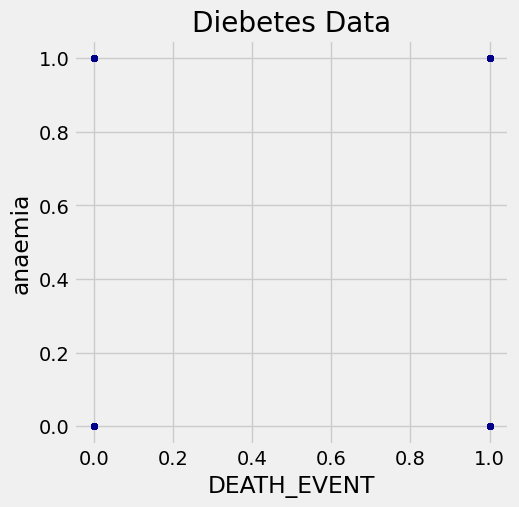

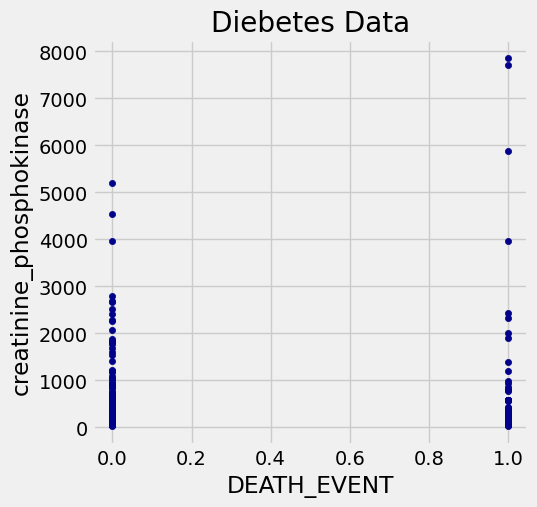

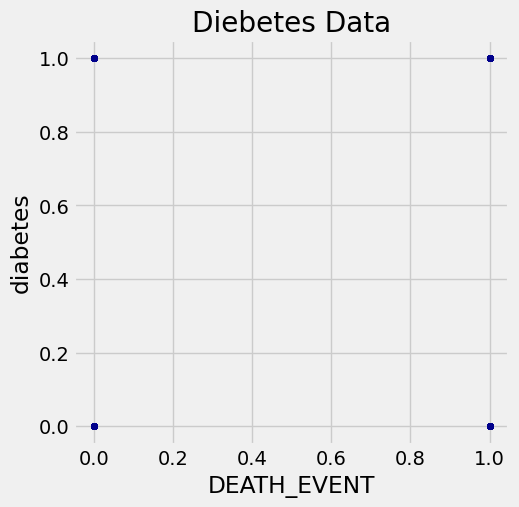

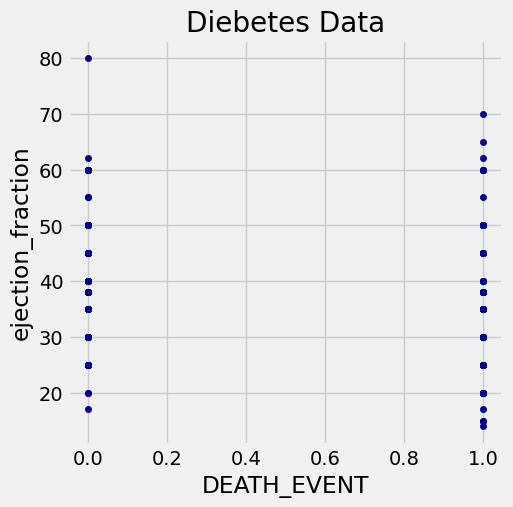

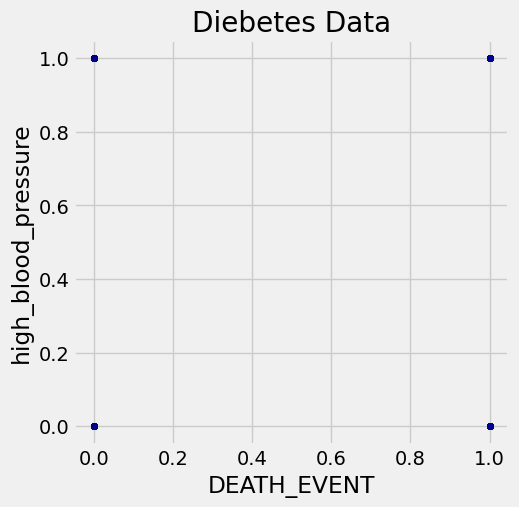

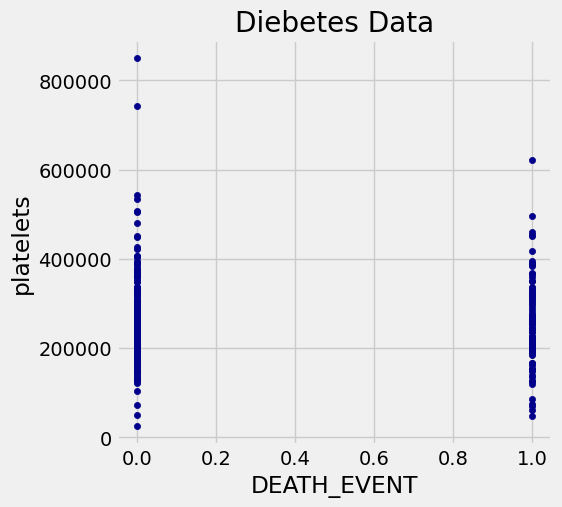

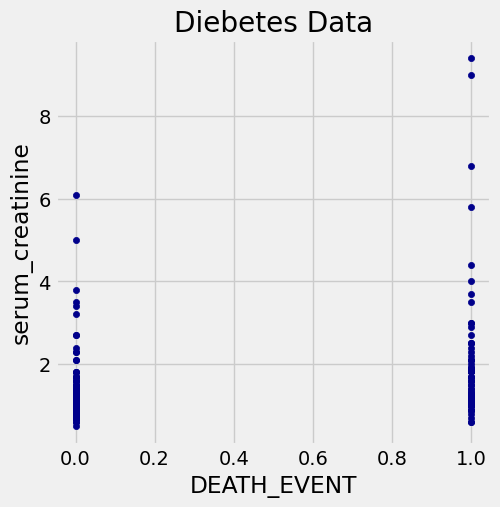

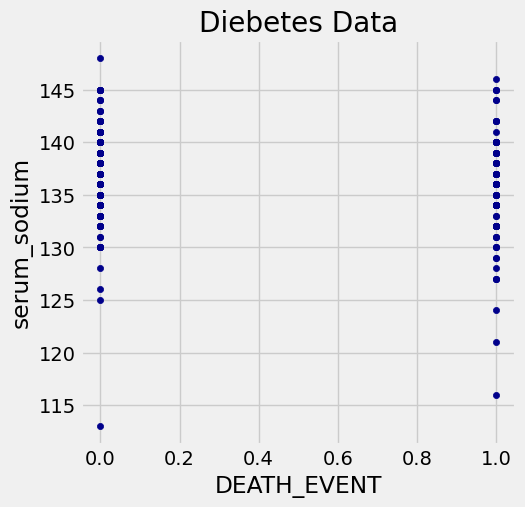

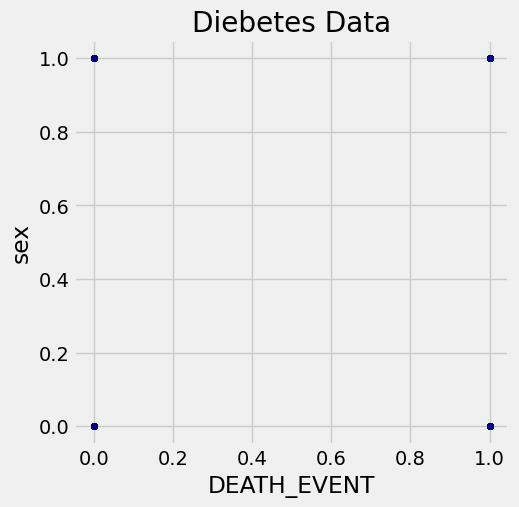

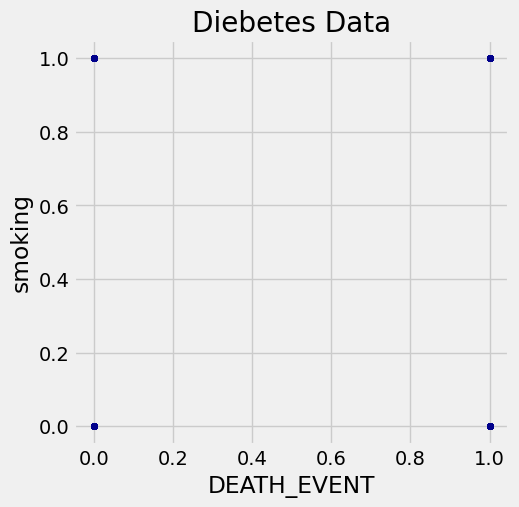

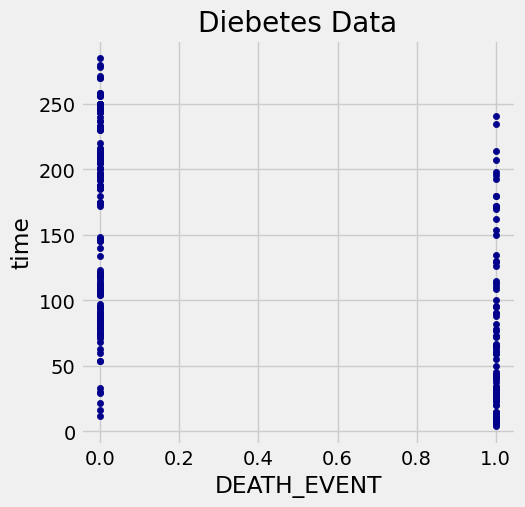

In [ ]:
#displaying a scatterplot of all columns v/s price as the y axis. 
for ax in numerical_cols:
       g = df.plot.scatter(y=ax, x='DEATH_EVENT', c='Darkblue', figsize=(5, 5))
       plt.style.use('fivethirtyeight')
       g.set_title("Diebetes Data")
       
       

In [ ]:
corr = df.corr()

<Axes: >

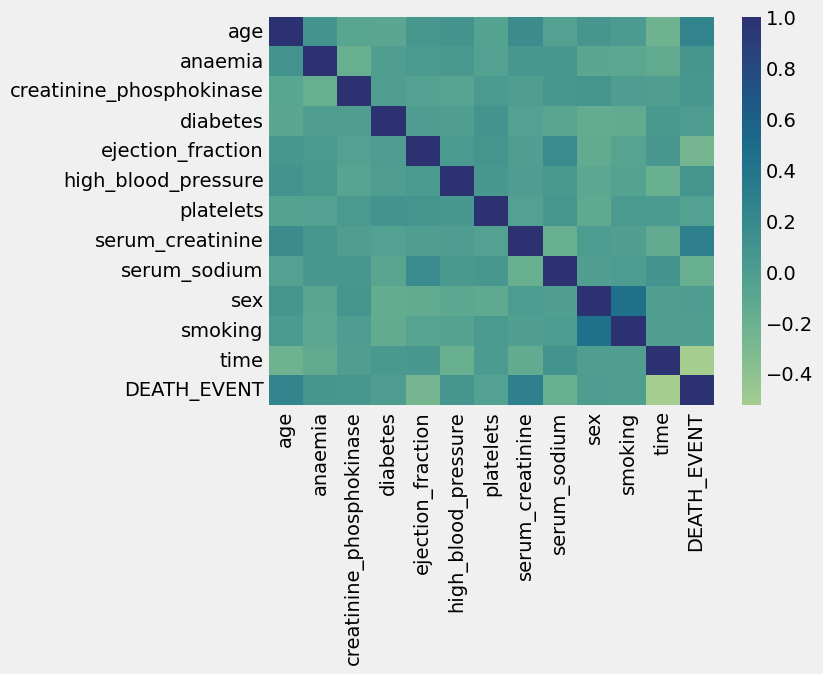

In [ ]:
sns.heatmap(corr, cmap='crest')

## Baseline Models

In [ ]:
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.30)

### Logistic Regression 

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_y_pred = log_reg.predict(X_test)

log_recall      = recall_score(y_test, log_y_pred)
log_accuracy    = accuracy_score(y_test, log_y_pred)
log_roc_auc     = roc_auc_score(y_test, log_y_pred)
log_f1          = f1_score(y_test, log_y_pred) 
log_precision   = precision_score(y_test, log_y_pred, average='macro')

print ("Recall score    ", log_recall)
print ("Accuracy score  ", log_accuracy)
print ("F1 Score        ", log_f1)
print ("Precision Score ", log_precision)
print ("Roc Auc Score   ", log_roc_auc) 


Recall score     0.5357142857142857
Accuracy score   0.8
F1 Score         0.6250000000000001
Precision Score  0.7821428571428571
Roc Auc Score    0.7275345622119815


### Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_y_pred = decision_tree.predict(X_test)

decision_recall      = recall_score(y_test, decision_y_pred)
decision_accuracy    = accuracy_score(y_test, decision_y_pred)
decision_roc_auc     = roc_auc_score(y_test, decision_y_pred)
decision_f1          = f1_score(y_test, decision_y_pred) 
decision_precision   = precision_score(y_test, decision_y_pred, average='macro')

print ("Recall score    ", decision_recall)
print ("Accuracy score  ", decision_accuracy)
print ("F1 Score        ", decision_f1)
print ("Precision Score ", decision_precision)
print ("Roc Auc Score   ", decision_roc_auc) 

Recall score     0.75
Accuracy score   0.8
F1 Score         0.7
Precision Score  0.7677801724137931
Roc Auc Score    0.7862903225806451


### Random Forest

In [ ]:
random_forest_clf = RandomForestClassifier()
random_forest_clf.fit(X_train, y_train)
random_forest_y_pred = random_forest_clf.predict(X_test)

random_forest_recall      = recall_score(y_test, random_forest_y_pred)
random_forest_accuracy    = accuracy_score(y_test, random_forest_y_pred)
random_forest_roc_auc = roc_auc_score(y_test, random_forest_y_pred)
random_forest_f1          = f1_score(y_test, random_forest_y_pred)
random_forest_precision   = precision_score(y_test, random_forest_y_pred)   

print ("Recall score    ", random_forest_recall)
print ("Accuracy score  ", random_forest_accuracy)
print ("F1 Score        ", random_forest_f1)
print ("Precision Score ", random_forest_precision)
print ("Roc Auc Score   ", random_forest_roc_auc)

Recall score     0.6785714285714286
Accuracy score   0.8333333333333334
F1 Score         0.7169811320754718
Precision Score  0.76
Roc Auc Score    0.7908986175115207


### XGBoost 

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_y_pred = xgb_clf.predict(X_test)

xgb_recall      = recall_score(y_test, xgb_y_pred)
xgb_accuracy    = accuracy_score(y_test, xgb_y_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_y_pred)
xgb_f1          = f1_score(y_test, xgb_y_pred)
xgb_precision   = precision_score(y_test, xgb_y_pred)

print ("Recall score    ", xgb_recall)
print ("Accuracy score  ", xgb_accuracy)
print ("F1 Score        ", xgb_f1)
print ("Precision Score ", xgb_precision)
print ("Roc Auc Score   ", xgb_roc_auc)

Recall score     0.6785714285714286
Accuracy score   0.8222222222222222
F1 Score         0.7037037037037038
Precision Score  0.7307692307692307
Roc Auc Score    0.7828341013824885


In [ ]:
models = pd.DataFrame({
    'Model':['Logistic', 'Decision Tree', 'Random Forest','XGBoost'],
    'Accuracy Score' :[log_accuracy, decision_accuracy, random_forest_accuracy, xgb_accuracy],
    'Roc Auc Score' : [log_roc_auc, decision_roc_auc, random_forest_roc_auc, xgb_roc_auc]
})

#sns.barplot(x='', data=models) 
#plt.bar(x=models['Recall_SMOTE'])


models.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score,Roc Auc Score
2,Random Forest,0.833333,0.790899
3,XGBoost,0.822222,0.782834
0,Logistic,0.800000,0.727535
1,Decision Tree,0.800000,0.786290


## Grid Search for all the models 

### Logistic Regression

In [ ]:
scoring = ["accuracy", "roc_auc"]

In [ ]:
log_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}


In [ ]:
log_grid_search = GridSearchCV(estimator = log_reg, cv=5, verbose=1, scoring='accuracy', param_grid=log_param_grid)

In [ ]:
log_result = log_grid_search.fit(X, y)

Fitting 5 folds for each of 490 candidates, totalling 2450 fits


In [ ]:
print('Best Score: %s' % log_result.best_score_)
print('Best Hyperparameters: %s' % log_result.best_params_)

Best Score: 0.795593220338983
Best Hyperparameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


### Decision Tree

In [ ]:
decision_param_grid = {
            'max_depth' : range(1,10),
            'max_leaf_nodes': list(range(2, 100)),
            'min_samples_split': range(1,5),
            'criterion': ['gini','entropy'],
            'min_samples_leaf': range(1,5)
}


In [ ]:
decision_grid_search = GridSearchCV(estimator=decision_tree,  cv=5, verbose=1, scoring='accuracy', param_grid=decision_param_grid, n_jobs=-1)

In [ ]:
decision_result = decision_grid_search.fit(X, y)

Fitting 5 folds for each of 28224 candidates, totalling 141120 fits


In [ ]:
print('Best Score: %s' % decision_result.best_score_)
print('Best Hyperparameters: %s' % decision_result.best_params_)

Best Score: 0.7289265536723164
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Random Forest Grid Search

In [ ]:
random_forest_param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


In [ ]:
random_forest_grid_search = GridSearchCV(estimator=random_forest_clf, cv=5, verbose=1, scoring='accuracy', param_grid=random_forest_param_grid)

In [ ]:
random_forest_result = random_forest_grid_search.fit(X,y)
print('Best Score: %s' % random_forest_result.best_score_)
print('Best Hyperparameters: %s' % random_forest_result.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Score: 0.7255932203389831
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}


### XGBoost grid search 

In [ ]:
xgb_param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }


In [ ]:
xgb_grid_search = GridSearchCV(estimator=xgb_clf, cv=5, verbose=1, scoring='accuracy', param_grid = xgb_param_grid)
xgb_result = xgb_grid_search.fit(X,y)
print('Best Score: %s' % xgb_result.best_score_)
print('Best Hyperparameters: %s' % xgb_result.best_params_)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best Score: 0.7322598870056497
Best Hyperparameters: {'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.6}


In [ ]:
### from this part I use eli5 and other library to explain the regressio. It would be a good idea to also change the parameters in the xgboost model to tweak it. not just the hyper parameters 

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=ab4a15d932285fe13df266da8ea235947ce787f45d36a4220b6fef7540777230
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


In [ ]:
import eli5

In [ ]:
from eli5 import show_weights
from eli5.sklearn import PermutationImportance

Best Hyperparameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
log_reg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=100,C=0.01)
log_reg.fit(X_train,y_train)
log_y_pred = log_reg.predict(X_test)

log_recall      = recall_score(y_test, log_y_pred)
log_accuracy    = accuracy_score(y_test, log_y_pred)
log_roc_auc     = roc_auc_score(y_test, log_y_pred)
log_f1          = f1_score(y_test, log_y_pred) 
log_precision   = precision_score(y_test, log_y_pred, average='macro')

print ("Recall score    ", log_recall)
print ("Accuracy score  ", log_accuracy)
print ("F1 Score        ", log_f1)
print ("Precision Score ", log_precision)
print ("Roc Auc Score   ", log_roc_auc) 


Recall score     0.5357142857142857
Accuracy score   0.8
F1 Score         0.6250000000000001
Precision Score  0.7821428571428571
Roc Auc Score    0.7275345622119815


In [ ]:
show_weights(log_reg, show_feature_values=True)

Weight?,Feature
+0.041,x0
+0.011,x8
+0.006,x7
+0.000,<BIAS>
+0.000,x2
+0.000,x9
+0.000,x5
-0.000,x6
-0.000,x3
-0.000,x10


In [ ]:
eli5.show_prediction(log_reg, X.iloc[1], show_feature_values=True)

### Appling ELI5 to Decision Tree

In [ ]:
## Running the best param decision tree


{'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [ ]:
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=1, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=2)
decision_tree.fit(X_train, y_train)
decision_y_pred = decision_tree.predict(X_test)

decision_recall      = recall_score(y_test, decision_y_pred)
decision_accuracy    = accuracy_score(y_test, decision_y_pred)
decision_roc_auc     = roc_auc_score(y_test, decision_y_pred)
decision_f1          = f1_score(y_test, decision_y_pred) 
decision_precision   = precision_score(y_test, decision_y_pred, average='macro')

print ("Recall score    ", decision_recall)
print ("Accuracy score  ", decision_accuracy)
print ("F1 Score        ", decision_f1)
print ("Precision Score ", decision_precision)
print ("Roc Auc Score   ", decision_roc_auc) 



Recall score     0.5357142857142857
Accuracy score   0.8222222222222222
F1 Score         0.6521739130434783
Precision Score  0.8263888888888888
Roc Auc Score    0.743663594470046


In [ ]:
show_weights(decision_tree, show_feature_values=True)

Weight,Feature
1.0000,x11
0,x10
0,x9
0,x8
0,x7
0,x6
0,x5
0,x4
0,x3
0,x2


In [ ]:
eli5.show_prediction(decision_tree, X.iloc[1], show_feature_values=True)